Add Imports

In [1]:
from models import hog_svm_model
from utilities import path_retrievers, model_evaluator
import os

Define Utilities

In [2]:
path_retriever = path_retrievers.PathRetrievers()

Evaluate HOG + SVM

Accuracy: 0.8384
Precision: 0.8335
Recall: 0.8384
F1-Score: 0.8344
Confusion Matrix:
[[ 24  27   0]
 [ 28 355   5]
 [  2  12   5]]


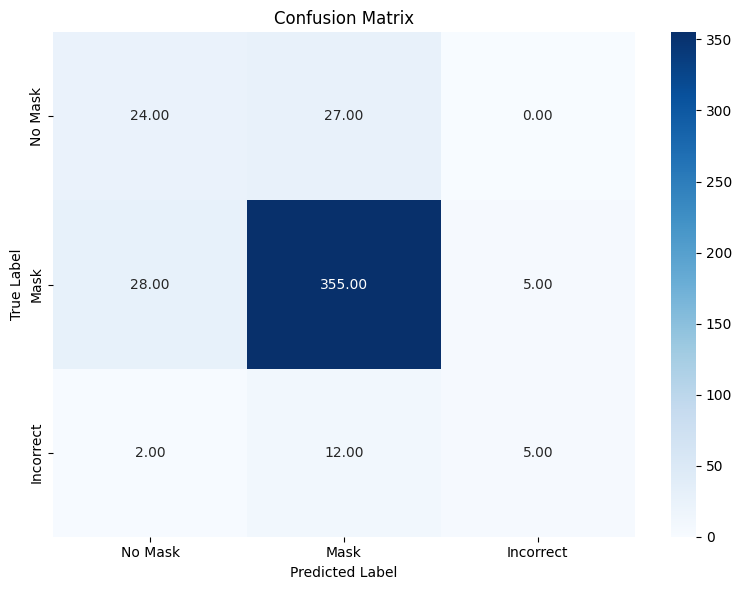

In [3]:
model = hog_svm_model.HogSvmModel()
save_path = os.path.join(path_retriever.path_to_export_trained_models, 'hog_svm_model.joblib')
evaluator = model_evaluator.ModelEvaluator(model=model, model_path=save_path)
y_true, y_pred = evaluator.evaluate(path_retriever.path_to_dataset_test_images, path_retriever.path_to_dataset_test_labels)
evaluator.create_confusion_matrix(y_true=y_true, y_pred=y_pred)